In [35]:
import re

import lightgbm as lgb
import pandas as pd
import numpy as np

In [21]:
from sklearn.preprocessing import OneHotEncoder

def fit_one_hot_encoder(ser: pd.Series, count_threshold: int, dtype="uint8", logger=None) -> OneHotEncoder:
    ser_count_dict = ser.value_counts().to_dict()
    counts = ser.apply(lambda x: 0 if x is None else ser_count_dict[x])
    ser_filterd = ser[counts > count_threshold].copy().dropna()

    if len(ser_filterd) == 0:
        if logger:
            logger.info(f"No value remained after filtered by shreshold {count_threshold} for feature")
        return OneHotEncoder(handle_unknown="ignore", dtype=dtype).fit(ser.copy().dropna().to_frame())

    return OneHotEncoder(handle_unknown="ignore", dtype=dtype).fit(ser_filterd.to_frame())

In [80]:
df = pd.read_parquet('./dataset_prep/raw_df_small.parquet').drop(
    columns=['click', 'market_price']
)[:100000]

In [81]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23
0,1178223,1625066,393302,625769,964256,214470,197303,428968,1605890,1660804,...,1303617,750141,500404,321787,785716,1142823,893375,1071611,644683,161291
1,1124346,1356543,1589290,197303,1499217,536528,107421,714414,1178215,1035659,...,1642276,750141,714422,1106066,428949,161074,321787,1481982,464612,590151
2,1392266,1642301,1749294,964256,1320957,1731995,535998,1056276,18509,428968,...,750167,607307,1767740,1625061,1303571,1410718,750141,464613,321787,590151
3,1642301,1249385,1731995,1392241,428968,750167,607307,285978,321787,1392266,...,928871,1375039,964714,1427872,428948,1625061,1767740,1410718,750141,732902
4,1392266,1642301,1249385,1392241,964256,1320957,1731995,1056276,18509,428968,...,750167,607307,1625061,428948,285978,1303571,1410718,411672,750141,321787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,964256,52319,989550,1499217,107421,428968,714414,1606710,233106,1625061,...,428949,375950,107418,321787,375955,464612,946908,590151,35959,607802
99996,1731995,1553457,1589290,964257,1499217,107421,90228,714414,1035659,54611,...,71737,750141,714422,428949,321787,447392,464612,928870,590151,679006
99997,143107,729162,911584,964256,786211,1589290,428968,1107036,928871,428980,...,233106,1625061,71865,750141,714422,464613,321787,964238,590151,90199
99998,1268163,804175,964256,786211,197303,428968,1107036,928871,643005,872594,...,1410710,178641,1601207,750141,714422,464613,321787,964238,590151,90199


In [82]:
for c in df.columns:
    _counts = df[c].value_counts()
    _stay_values = _counts[_counts > 100].index
    df[c] = np.where(df[c].isin(_stay_values), df[c], 0)

In [83]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23
0,1178223,0,0,625769,964256,0,197303,428968,1605890,1660804,...,1303617,750141,500404,321787,0,1142823,0,0,0,0
1,1124346,0,1589290,197303,1499217,536528,107421,714414,1178215,1035659,...,1642276,750141,714422,0,428949,0,321787,1481982,464612,590151
2,1392266,1642301,1749294,964256,0,1731995,535998,0,18509,428968,...,0,607307,0,1625061,0,0,750141,464613,321787,590151
3,1642301,1249385,1731995,1392241,428968,0,0,0,321787,1392266,...,928871,0,0,1427872,0,1625061,0,0,750141,0
4,1392266,1642301,1249385,1392241,964256,0,1731995,0,18509,428968,...,0,607307,1625061,428948,285978,0,0,0,750141,321787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,964256,0,0,1499217,107421,428968,714414,0,233106,1625061,...,0,0,0,321787,0,464612,0,590151,0,0
99996,1731995,0,1589290,0,1499217,107421,0,714414,1035659,0,...,0,750141,714422,428949,321787,447392,464612,928870,590151,0
99997,143107,0,911584,964256,786211,1589290,428968,1107036,928871,428980,...,233106,1625061,71865,750141,714422,464613,321787,964238,590151,90199
99998,1268163,804175,964256,786211,197303,428968,1107036,928871,0,0,...,1410710,178641,0,750141,714422,464613,321787,964238,590151,90199


In [84]:
encoders =  {}
for c in df.columns:
    encoders[c] = fit_one_hot_encoder(df[c], 50)

In [85]:
onehot = {}
for c in df.columns:
    _onehot = encoders[c].transform(df[c].values.reshape(-1, 1))
    col_names = [re.sub("^x0_", '', cn) for cn in encoders[c].get_feature_names()]
    onehot[c] = pd.DataFrame.sparse.from_spmatrix(_onehot, columns=col_names, index=df.index)

In [86]:
p_x = {}
for c in df.columns[:-2]:
    p_x[c] = df[c].value_counts()/len(df)

In [89]:
def calc_mutual_score(c1, c2):
    if c1 == c2:
        return 0
    p_c1 = p_x[c1].values
    p_c2 = p_x[c2].values
    ret = 0
    dsize = len(df)
    for idx1, x_1 in enumerate(p_x[c1].index.values):
        if x_1 == 0:
            continue
        p_x1 = p_c1[idx1]
        for idx2, x_2 in enumerate(p_x[c2].index.values):
            if x_2 == 0:
                continue
            joint_probability = np.dot(onehot[c1][str(x_1)], onehot[c2][str(x_2)])/dsize
            if joint_probability == 0:
                continue
            ret +=  joint_probability * np.log2(joint_probability/(p_x1*p_c2[idx2]))
    return ret

In [90]:
%%time
score = np.zeros([24, 24])
count = 1
for idx1, c1 in enumerate(df.columns[:-2]):
    for idx2, c2 in enumerate(df.columns[:-2]):
        score[idx1][idx2] = calc_mutual_score(c1, c2)
    print(c1)

feature_0
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
feature_10
feature_11
feature_12
feature_13
feature_14
feature_15
feature_16
feature_17
feature_18
feature_19
feature_20
feature_21
CPU times: user 18min 19s, sys: 76.4 ms, total: 18min 19s
Wall time: 18min 19s


In [92]:
import pickle

In [94]:
with open('./mutual_information.pickle', 'wb') as out:
    out.write(pickle.dumps(score))

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mutual Information')

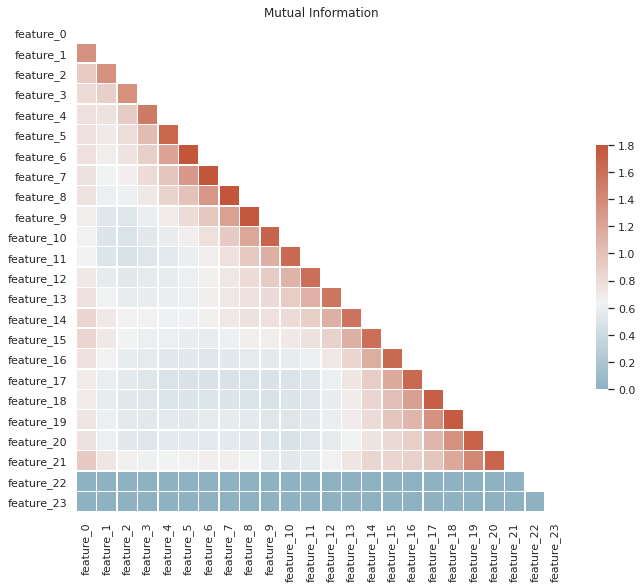

In [119]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(score, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(score, mask=mask, cmap=cmap, vmax=1.8, center=np.mean(score),
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           xticklabels=df.columns, yticklabels=df.columns)
plt.title('Mutual Information')

In [113]:
np.mean(score)

0.6415010579439449